In [ ]:
# pip install -q inference-sdk

In [53]:
import cv2
import os
from dotenv import load_dotenv
from inference import get_model
import supervision as sv

In [54]:
# Load API KEYS of Roboflow Model
# Load environment variables from the .env file
load_dotenv()

# Access the API key
detection_api_key = os.getenv("detection_api")
classification_api_key = os.getenv("classification_api")

In [85]:
# Function to extract frames of video
def extract_frames(video_path, output_folder, interval=1):
    cap = cv2.VideoCapture(video_path)
    count = 0
    success, frame = cap.read()
    while success:
        if count % interval == 0:
            frame_filename = os.path.join(output_folder, f"frame_{count}.jpg")
            cv2.imwrite(frame_filename, frame)
        success, frame = cap.read()
        count += 1
    cap.release()
    

In [103]:
# Funtion to classify the frame:
def classification_model(image):
    # import the inference-sdk
    from inference_sdk import InferenceHTTPClient

    # initialize the client
    CLIENT = InferenceHTTPClient(
        api_url="https://detect.roboflow.com",
        api_key= classification_api_key
    )
    # infer on a local image
    result = CLIENT.infer(image, model_id="emergency-response-classfication/1")
    if result['top'] == 'violence':
        return True

In [87]:
# Function to detect violence in the frame:
def detection_model(image):
    # load a pre-trained yolov8n model
    model = get_model(model_id="emergency-response/1",api_key = detection_api_key)
    # run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
    results = model.infer(image)[0]
    # load the results into the supervision Detections api
    detections = sv.Detections.from_inference(results)

    # create supervision annotators
    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    # annotate the image with our inference results
    annotated_image = bounding_box_annotator.annotate(
        scene=image, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections)

    # display the image
    sv.plot_image(annotated_image)

In [108]:
video_path = r'Real Life Violence Dataset\Violence\V_11.mp4'

In [109]:
extract_frames(video_path, '', interval=30)

In [110]:
output_path = os.getcwd()
images_paths = []

In [111]:
for filename in os.listdir(output_path):
    # Construct the full file path
    file_path = os.path.join(output_path, filename)
    
    # Check if it's a file (not a directory) and optionally check for specific file extensions
    if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Append the file path to the list
        images_paths.append(file_path)

In [112]:
images_paths

['c:\\Users\\ACER\\Desktop\\Frame Extraction\\frame_0.jpg',
 'c:\\Users\\ACER\\Desktop\\Frame Extraction\\frame_120.jpg',
 'c:\\Users\\ACER\\Desktop\\Frame Extraction\\frame_150.jpg',
 'c:\\Users\\ACER\\Desktop\\Frame Extraction\\frame_180.jpg',
 'c:\\Users\\ACER\\Desktop\\Frame Extraction\\frame_210.jpg',
 'c:\\Users\\ACER\\Desktop\\Frame Extraction\\frame_30.jpg',
 'c:\\Users\\ACER\\Desktop\\Frame Extraction\\frame_60.jpg',
 'c:\\Users\\ACER\\Desktop\\Frame Extraction\\frame_90.jpg']

Function Call


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


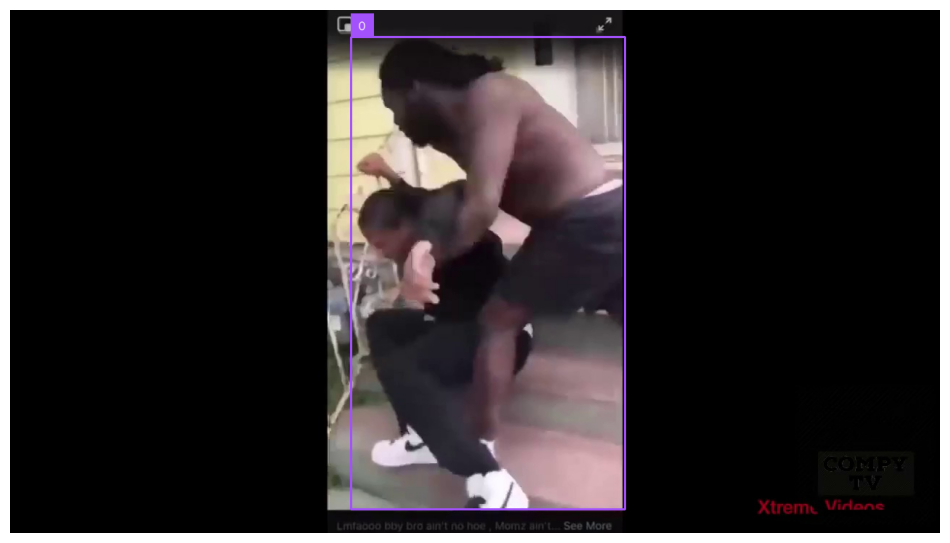

Function Call


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


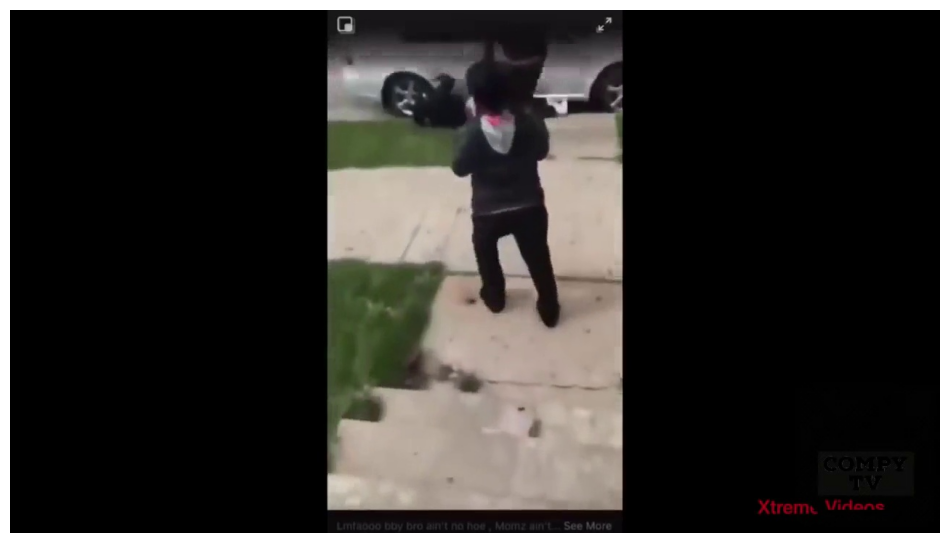

Function Call


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


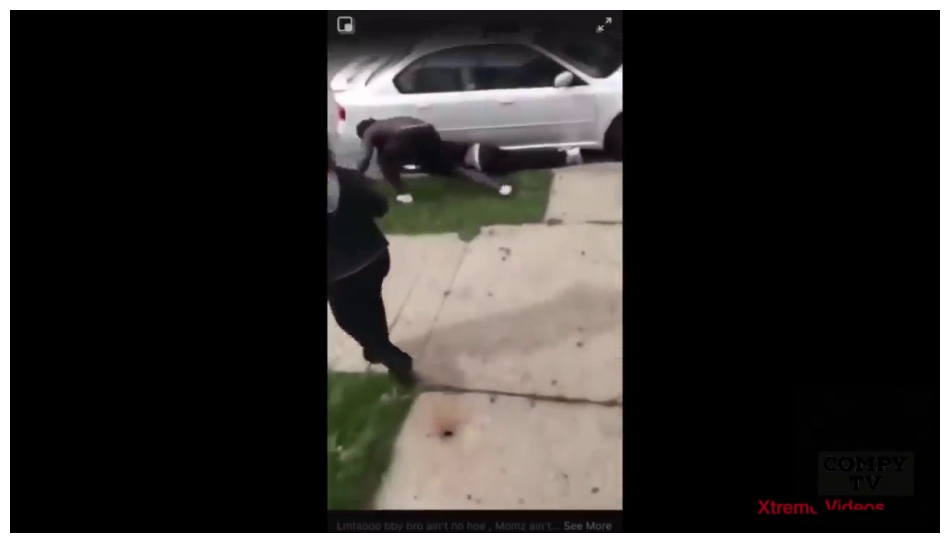

Function Call


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


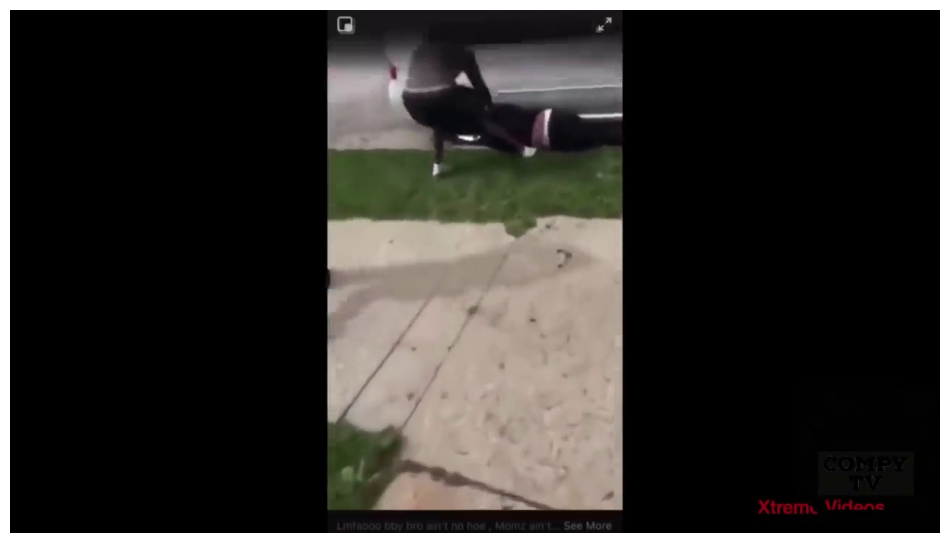

Function Call


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


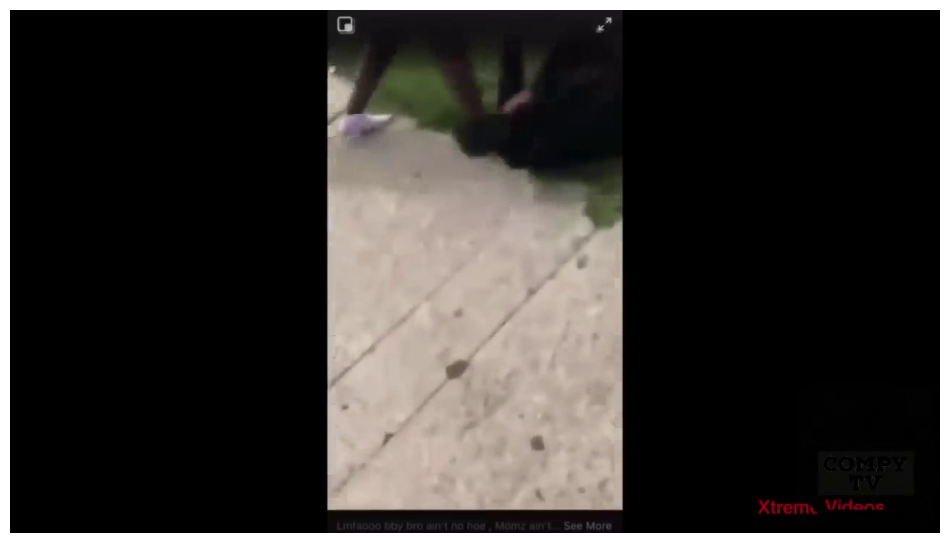

Function Call


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


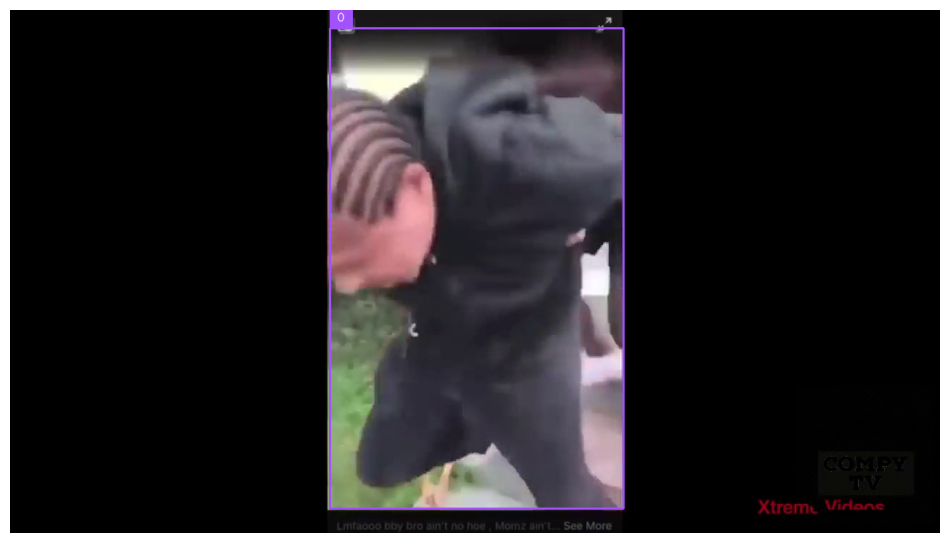

Function Call


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


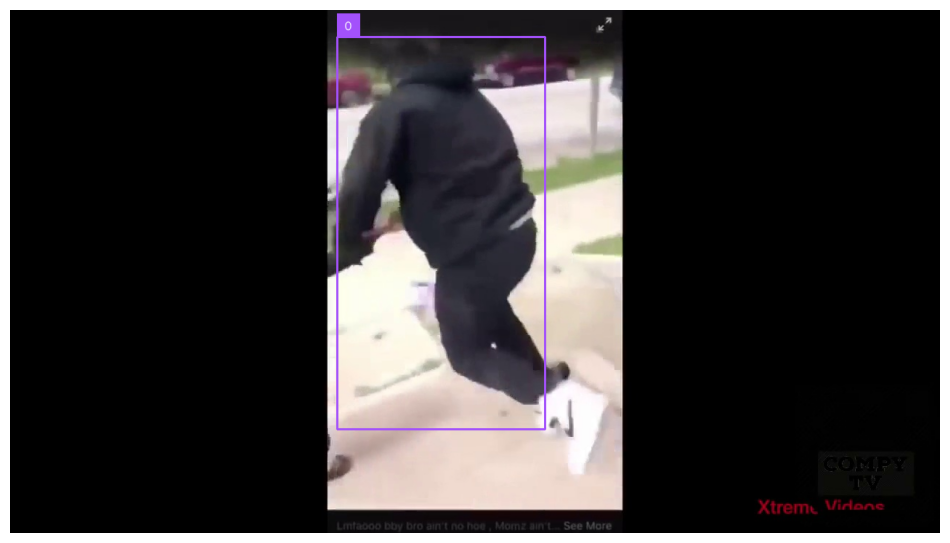

Function Call


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


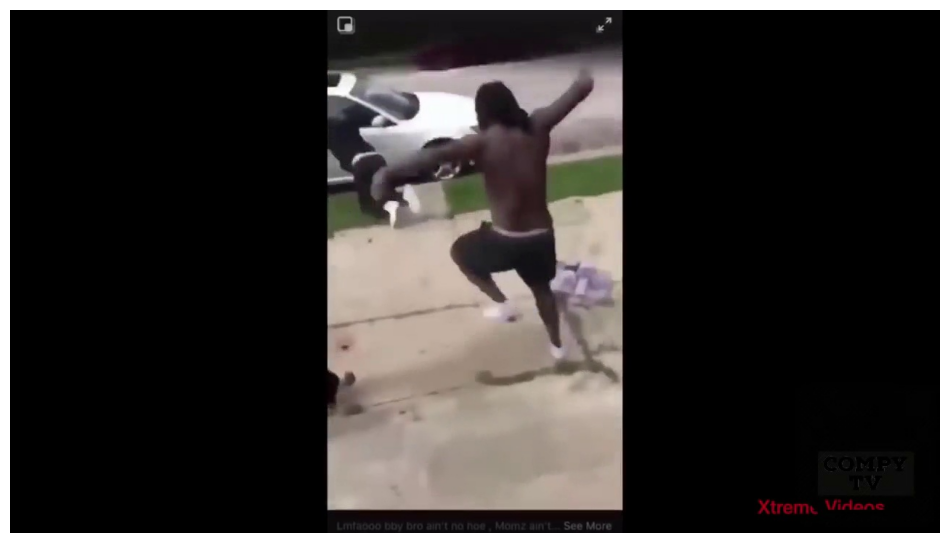

In [113]:
for image_path in images_paths:
    image_file = image_path
    image = cv2.imread(image_file)
    violence = (classification_model(image))
    if violence:
        print('Function Call')
        detection_model(image)